In [1]:
from monodromy.haar import gates_to_haar
from qiskit.circuit.library import CXGate, iSwapGate

print(gates_to_haar(CXGate()))
print(gates_to_haar(iSwapGate()))
print(gates_to_haar(iSwapGate().power(1 / 2)))

3.000000000000001
3.000000000000001
2.2098826363156774


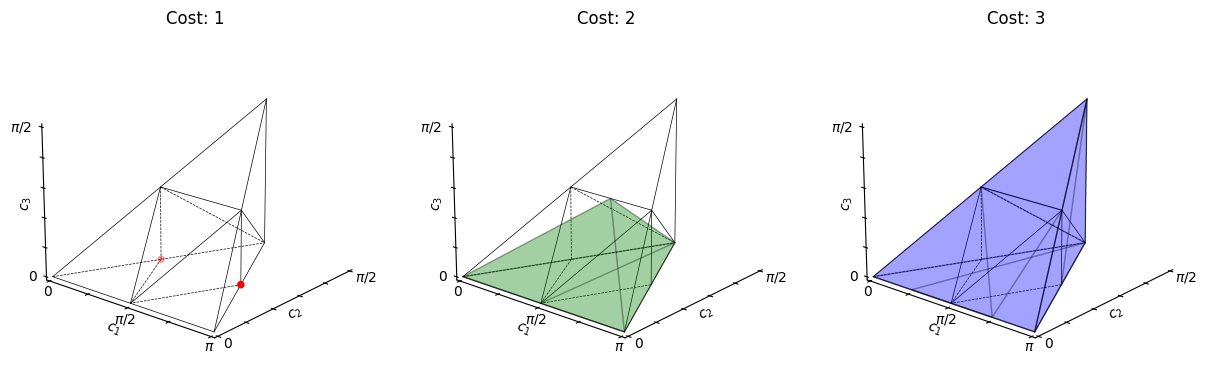

[CircuitPolytope(convex_subpolytopes=[ConvexPolytope(inequalities=[], equalities=[[0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]], name='origin')], cost=0.0, operations=[], instructions=[]),
 CircuitPolytope(convex_subpolytopes=[ConvexPolytope(inequalities=[[1, 0, 0, 0]], equalities=[[-1, 4, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]], name='True ∩ QLR relations ∩ A_SU(4)^monodromy ∩ A_SU(4)^monodromy ∩ A_SU(4)^monodromy ∩ True ∩ QLR relations ∩ A_SU(4)^monodromy ∩ A_SU(4)^monodromy ∩ A_SU(4)^monodromy ∩ origin ∩ anonymous_convex_polytope_25 ∩ True ∩ A_PU(4)^monodromy ∩ A_PU(4)^monodromy ∩ origin'), ConvexPolytope(inequalities=[[1, 0, 0, 0]], equalities=[[-1, 2, 0, 0], [-1, 0, 4, 0], [1, 0, 0, 4]], name='True ∩ QLR relations ∩ A_SU(4)^monodromy ∩ A_SU(4)^monodromy ∩ A_SU(4)^monodromy ∩ anonymous_convex_polytope_26 ∩ A_SU(4)^monodromy ∩ A_SU(4)^monodromy ∩ A_SU(4)^monodromy ∩ origin ∩ anonymous_convex_polytope_25 ∩ True ∩ A_PU(4)^monodromy ∩ A_PU(4)^monodromy ∩ origin')], cost=1, operations=['xx_plus_

In [2]:
from monodromy.render import gates_to_coverage_plot

gates_to_coverage_plot(iSwapGate().power(1 / 2), overlap=False)

In [7]:
from monodromy.depthPass import MonodromyDepth
from qiskit.transpiler.passmanager import PassManager
from qiskit.circuit.library import iSwapGate
from qiskit.transpiler.passes import Depth
from qiskit import QuantumCircuit

pm = PassManager()
pm.append(Depth())
pm.append(MonodromyDepth(basis_gate=iSwapGate().power(1 / 2)))

qc = QuantumCircuit(4)
qc.swap(0, 1)
qc.cx(0, 1)
qc.cx(1, 2)
qc.swap(0, 1)
display(qc.draw())

pm.run(qc)
expected_value = 7
print(f"Depth: {pm.property_set['depth']}")
print(f"Monodromy depth: {pm.property_set['monodromy_depth']}")
assert (
    pm.property_set["monodromy_depth"] == expected_value
), "Monodromy depth not calculated correctly!"

q_0: ─X───■────────X─
      │ ┌─┴─┐      │ 
q_1: ─X─┤ X ├──■───X─
        └───┘┌─┴─┐   
q_2: ────────┤ X ├───
             └───┘   
q_3: ────────────────

Depth: 4
Monodromy depth: 10.0


AssertionError: Monodromy depth not calculated correctly!

In [8]:
from monodromy.depthPass import MonodromyDepth
from qiskit.transpiler.passmanager import PassManager
from qiskit.circuit.library import CXGate
from qiskit import QuantumCircuit

pm = PassManager()
pm.append(MonodromyDepth(basis_gate=CXGate()))

qc = QuantumCircuit(3)
qc.swap(0, 1)
qc.cx(0, 1)
qc.cx(1, 2)
qc.swap(0, 1)
display(qc.draw())

pm.run(qc)

pm.property_set["monodromy_depth"]

q_0: ─X───■────────X─
      │ ┌─┴─┐      │ 
q_1: ─X─┤ X ├──■───X─
        └───┘┌─┴─┐   
q_2: ────────┤ X ├───
             └───┘

8.0

In [9]:
# from monodromy.coordinates import monodromy_to_positive_canonical_coordinate, positive_canonical_to_monodromy_coordinate, mirror_positive_canonical_coordinate, mirror_monodromy_coordinate
from monodromy.coordinates import (
    unitary_to_monodromy_coordinate,
    mirror_monodromy_coordinate,
)
from qiskit.circuit.library import SwapGate


def verbose(unitary):
    # new_unitary = unitary @ SwapGate().to_matrix()
    new_unitary = SwapGate().to_matrix() @ unitary
    return unitary_to_monodromy_coordinate(new_unitary)


from qiskit.quantum_info import random_unitary
import numpy as np

for _ in range(50):
    u = random_unitary(4).to_matrix()
    mono_coord = unitary_to_monodromy_coordinate(u)
    print(mono_coord)
    v = verbose(u)
    print(v)
    w = mirror_monodromy_coordinate(mono_coord)
    print(w)
    assert (
        np.abs(v - w) < 1e-6
    ).all(), f"Failed for {u} with mono_coord {mono_coord} and v {v} and w {w}"

[0.2783873297033561, 0.1365131095913361, -0.125028594044794, -0.2898718452498983]
[0.3865131095913361, 0.12497140595520584, -0.039871845249898286, -0.47161267029664383]
[0.26383166984649037, 0.23733195486224412, 0.22062984153469173, -0.7217934662434262]


TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [10]:
for _ in range(5):
    u = random_unitary(4).to_matrix()
    mono_coords = unitary_to_monodromy_coordinate(u)
    print(mono_coords)
    canonical_coords = monodromy_to_positive_canonical_coordinate(*mono_coords[:-1])
    print(canonical_coords)
    new_mono_coords = positive_canonical_to_monodromy_coordinate(*canonical_coords)
    print(new_mono_coords)
    print("\n")

[0.4032657181666722, 0.10207917983761083, -0.06243923855560879, -0.4429056594486743]


NameError: name 'monodromy_to_positive_canonical_coordinate' is not defined

In [42]:
from monodromy.coordinates import (
    unitary_to_monodromy_coordinate,
    mirror_monodromy_coordinate,
    verbose_mirror_monodromy_coordinate,
)
from monodromy.coordinates import monodromy_to_positive_canonical_coordinate
from weylchamber import c1c2c3
from qiskit.quantum_info import random_unitary
from qiskit.circuit.library import SwapGate
import numpy as np

fails = []
for _ in range(1000):
    u = random_unitary(4).to_matrix()
    w = unitary_to_monodromy_coordinate(u)
    # print("original:\n", w:=unitary_to_monodromy_coordinate(u))
    # assert np.isclose(-(w[0] + w[1] + w[2]), w[3])

    # print("correct mirror:\n", x=unitary_to_monodromy_coordinate(u @ SwapGate().to_matrix()))
    # assert np.isclose(-(x[0] + x[1] + x[2]), x[3])

    x = unitary_to_monodromy_coordinate(u @ SwapGate().to_matrix())
    y = verbose_mirror_monodromy_coordinate(w)
    # print("verbose mirror:\n", y:=verbose_mirror_monodromy_coordinate(w))

    try:
        assert np.allclose(x, y)
    except AssertionError:
        # print(x, "\n", y, "\n\n")
        # fails.append(c1c2c3(u))
        m = monodromy_to_positive_canonical_coordinate(*w[:-1])
        z = [2 * c / np.pi for c in m]
        fails.append(z)

    # print("my mirror:\n", z:=mirror_monodromy_coordinate(w))
    # # print(unitary_to_monodromy_coordinate(SwapGate().to_matrix() @ u))
    # # assert np.allclose(x, z)
    # print("\n")

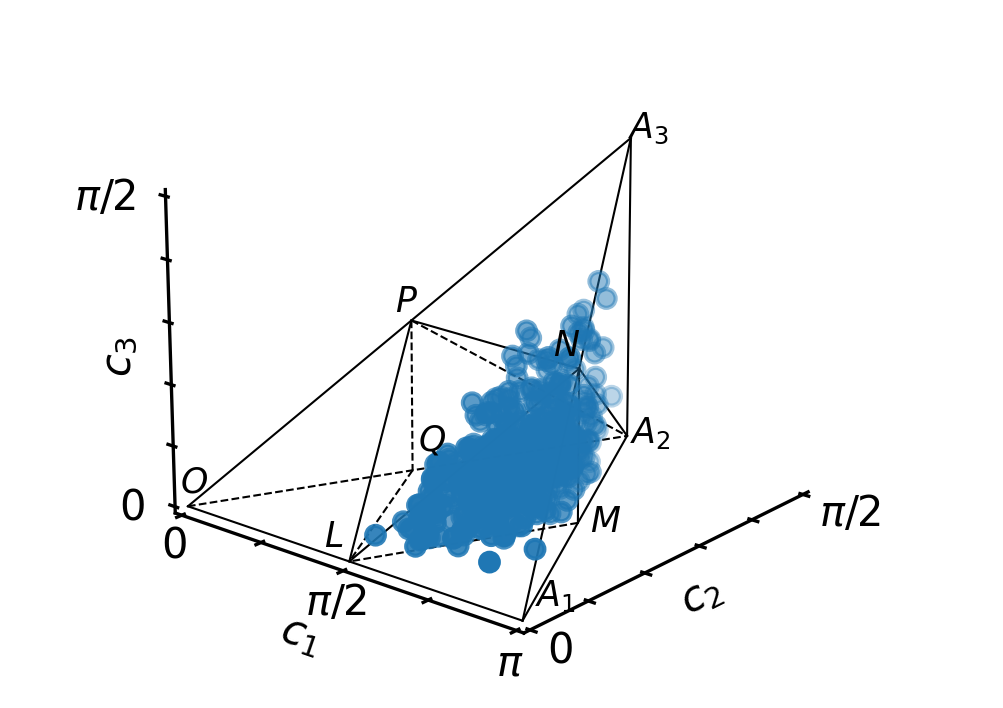

In [43]:
%matplotlib widget
from weylchamber import WeylChamber

w = WeylChamber()
for coord in fails:
    w.add_point(*coord)
w.plot()